In [39]:
import matplotlib.pyplot as plt

In [40]:
import pandas as pd

In [41]:
import numpy as np

# Constantes

In [43]:
k = 10
L0 = 1.986
m0 = 0.993
a = 1
grav = 9.81

In [44]:
tolerancia = 0.5*(10**(-15)) #0,5 * 10exp(-15)

# Funciones

In [45]:
class Function:
    coef = 1    
    def __init__(self,c):
        self.coef = c
    def calc(self,x):
        return f(x)-(m0*self.coef*grav)   
class Function_g:
    coef = 1    
    def __init__(self,c):
        self.coef = c
    def calc(self,x):
        return (-m0*self.coef*grav)/(2*k) + ((x*L0)/(np.sqrt(x**2+a**2))) 

In [205]:
def f (x):
    return -2*k*x*(1-(L0)/np.sqrt(x**2+a**2))
def f2 (x):
    return -(6*a**2*k*L0*x)/((a**2 + x**2)**(5/2))
#def f_m (x,coef):
    #a = f(x)
    #return (a)-(m0*coef*g)
def der_f(x):
    return ((-2*k*L0*x**2) / ((a**2+x**2)**(3/2))) - 2*k*(1-(L0/np.sqrt(a**2+x**2)))

def g(x):
    return (x*L0)/(np.sqrt(x**2+a**2))


In [102]:
def nr (p0,f,der_f,max_iter,tol,true_root = "None"):
    output = []
    cols = ["y","$\Delta y$","$\Delta y/y$"]
    c = True
    i = 0
    p = p0
    while (c and (i<=max_iter) and (f(p)!= 0)):
        old_p = p
        p = p - f(p)/der_f(p)
        output.append([old_p,np.abs(p-old_p),np.abs(p-old_p)/old_p])
        c = (np.abs(p-old_p) >= tol) if (true_root == 'None') else (np.abs(p-true_root) >= tol)
        i+=1
    output.append([p,'-','-'])
    df = pd.DataFrame(output)
    df.columns = cols
    return df
        

In [103]:
def biseccion (a,b,f,max_iter,tol,true_root = "None"):
    cols = ["a","b","f(a)","f(b)","r","$\Delta r$","$\Delta r/r$"]
    
    #primera iteracion es "especial" y la hago fuera
    r = (a+b)/2
    output=[]
    interval = f(a)*f(r)<0
    b = r*interval+b*(~interval)
    a = r*(~interval)+a*interval
    #fin de la primera iteracion
    
    c= True
    i=0
    while (c and (i<=max_iter) and f(r)!=0 ):
        old_r = r
        r = (a+b)/2
        
        table_entry = [a,b,f(a),f(b),r,np.abs(r-old_r),0]
        table_entry[6]=table_entry[5]/table_entry[4]
        
        if f(a)*f(r) < 0:
            b=r
        else:
            a=r
            
        if (true_root == "None"):
            c = (table_entry[5] >= tol)
        else:
            c = (np.abs(r-true_root) >= tol)
        output.append(table_entry)
        i+=1
    df = pd.DataFrame(output)
    df.columns = cols
    return df;
            

In [104]:
def pfijo (p0,g,max_iter,tol,true_root='None'):
    output = []
    p = p0
    i=0
    c = True
    while (c and (i<max_iter) and (g(p)!=p)):
        old_p = p
        p = g(p)
        output.append([old_p,np.abs(p-old_p),np.abs(p-old_p)/old_p])
        c = !(np.abs(p-true_root) < tol) if (true_root != 'None') else !(np.abs(p-old_p) < tol)
        i+=1
    output.append([p,'-','-'])
    return pd.DataFrame(output).rename(columns=pd.Series(['y','$\Delta y$','$\Delta y/y$']))

# Item 1

In [88]:
bisec1 = biseccion(1,2,f,200,tolerancia,np.sqrt(L0**2-a**2))

In [89]:
pd.set_option('precision',5)

In [90]:
print(pd.concat([bisec1.head(10),bisec1.tail(10)]).to_latex(longtable=True,escape=False))

\begin{longtable}{lrrrrrrr}
\toprule
{} &        a &        b &         f(a) &         f(b) &        r &     \Delta r &   \Delta r/r \\
\midrule
\endhead
\midrule
\multicolumn{8}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
0  &  1.50000 &  2.00000 &  3.04904e+00 & -4.47335e+00 &  1.75000 &  2.50000e-01 &  1.42857e-01 \\
1  &  1.50000 &  1.75000 &  3.04904e+00 & -5.13382e-01 &  1.62500 &  1.25000e-01 &  7.69231e-02 \\
2  &  1.62500 &  1.75000 &  1.32787e+00 & -5.13382e-01 &  1.68750 &  6.25000e-02 &  3.70370e-02 \\
3  &  1.68750 &  1.75000 &  4.20780e-01 & -5.13382e-01 &  1.71875 &  3.12500e-02 &  1.81818e-02 \\
4  &  1.68750 &  1.71875 &  4.20780e-01 & -4.30840e-02 &  1.70312 &  1.56250e-02 &  9.17431e-03 \\
5  &  1.70312 &  1.71875 &  1.89672e-01 & -4.30840e-02 &  1.71094 &  7.81250e-03 &  4.56621e-03 \\
6  &  1.71094 &  1.71875 &  7.34977e-02 & -4.30840e-02 &  1.71484 &  3.90625e-03 &  2.27790e-03 \\
7  &  1.71484 &  1.71875 &  1.52574e-02 & -4.30840e-

In [99]:
nr1 = nr(der_f=der_f,f=f,p0=2,tol=tolerancia,true_root=np.sqrt(L0**2-a**2),max_iter=30)

In [101]:
pd.set_option('precision',12)
print(nr1.to_latex(longtable=True,escape=False))

\begin{longtable}{lrll}
\toprule
{} &               y &             deltay &           deltay/y \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
0 &  2.000000000000 &     0.271980349388 &     0.135990174694 \\
1 &  1.728019650612 &    0.0121215400159 &   0.00701470033145 \\
2 &  1.715898110596 &  3.21482355439e-05 &  1.87355154396e-05 \\
3 &  1.715865962360 &  2.29059882173e-10 &    1.334952072e-10 \\
4 &  1.715865962131 &                  - &                  - \\
\end{longtable}



In [96]:
pf1 = pfijo(1.5,g,200,tolerancia,true_root=np.sqrt(L0**2-a**2))

In [97]:
print(pf1.to_latex(longtable=True,escape=False))

\begin{longtable}{lrll}
\toprule
{} &        y &    \Delta y &  \Delta y/y \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
0  &  1.50000 &     0.15245 &     0.10163 \\
1  &  1.65245 &    0.046648 &     0.02823 \\
2  &  1.69910 &    0.012468 &   0.0073382 \\
3  &  1.71157 &   0.0032051 &   0.0018726 \\
4  &  1.71477 &  0.00081547 &  0.00047555 \\
5  &  1.71559 &  0.00020694 &  0.00012062 \\
6  &  1.71580 &  5.2478e-05 &  3.0585e-05 \\
7  &  1.71585 &  1.3306e-05 &  7.7547e-06 \\
8  &  1.71586 &  3.3736e-06 &  1.9661e-06 \\
9  &  1.71586 &  8.5533e-07 &  4.9848e-07 \\
10 &  1.71587 &  2.1686e-07 &  1.2638e-07 \\
11 &  1.71587 &  5.4982e-08 &  3.2043e-08 \\
12 &  1.71587 &   1.394e-08 &  8.1241e-09 \\
13 &  1.71587 &  3.5343e-09 &  2.0598e-09 \\
14 &  1.71587 &  8.9607e-10 &  5.2223e-10 \\
15 &  1.71587 &  2.2719e-10 &   1.324e-10 \\
16 &  1.71587 &    5.76e-11 &  3.3569e-11 \\
17 &  1.71587 &  1.4604e-11 &  8.5111e

#### Punto fijo no converge porque la 'g' usada no tiene |g'| < 1 en un intervalo que contiene al punto fijo, tenemos que usar una g distinta a la que dice el enunciado.

In [56]:
import seaborn as sns

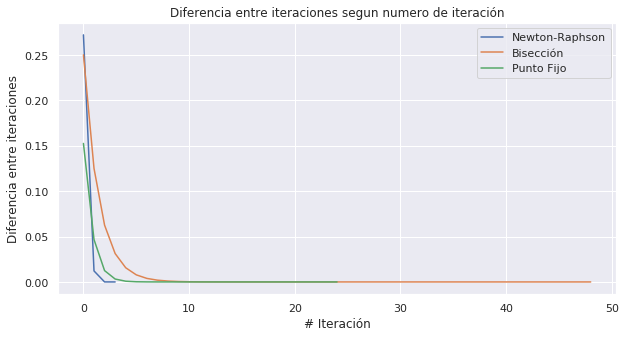

In [57]:
sns.set()
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(ax=ax,data=nr1['deltay'],label='Newton-Raphson')
sns.lineplot(ax=ax,data=bisec1['\Delta r'].astype(float),label='Bisección')
sns.lineplot(ax=ax,data=pf1['\Delta y'].astype(float),label='Punto Fijo')
plt.title('Diferencia entre iteraciones segun numero de iteración')
plt.xlabel('# Iteración')
plt.ylabel('Diferencia entre iteraciones')
plt.show()

### No se puede tomar dos iteraciones consecutivas como cota del error absoluto de truncamiento, el error absoluto puede ser mayor a la diferencia entre dos iteraciones consecutivas.

## Item 2

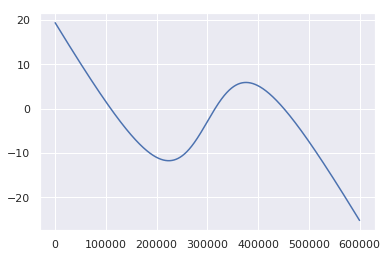

In [58]:
plt.plot(Function(0.3).calc(np.arange(-3,3,0.00001)))

### Biseccion

In [117]:
pd.set_option('precision',5)

In [118]:
bisec1=biseccion(a=-3,b=0,f=Function(0.3).calc,max_iter=200,tol=tolerancia)

In [119]:
print(pd.concat([bisec1.head(10),bisec1.tail(10)]).to_latex(longtable=True,escape=False))

\begin{longtable}{lrrrrrrr}
\toprule
{} &        a &        b &         f(a) &         f(b) &        r &   $\Delta r$ &  $\Delta r/r$ \\
\midrule
\endhead
\midrule
\multicolumn{8}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
0  & -3.00000 & -1.50000 &  1.93959e+01 & -5.97144e+00 & -2.25000 &  7.50000e-01 &  -3.33333e-01 \\
1  & -2.25000 & -1.50000 &  5.78101e+00 & -5.97144e+00 & -1.87500 &  3.75000e-01 &  -2.00000e-01 \\
2  & -2.25000 & -1.87500 &  5.78101e+00 & -4.69458e-01 & -2.06250 &  1.87500e-01 &  -9.09091e-02 \\
3  & -2.06250 & -1.87500 &  2.58698e+00 & -4.69458e-01 & -1.96875 &  9.37500e-02 &  -4.76190e-02 \\
4  & -1.96875 & -1.87500 &  1.03909e+00 & -4.69458e-01 & -1.92188 &  4.68750e-02 &  -2.43902e-02 \\
5  & -1.92188 & -1.87500 &  2.79541e-01 & -4.69458e-01 & -1.89844 &  2.34375e-02 &  -1.23457e-02 \\
6  & -1.92188 & -1.89844 &  2.79541e-01 & -9.63246e-02 & -1.91016 &  1.17188e-02 &  -6.13497e-03 \\
7  & -1.91016 & -1.89844 &  9.12728e-02 & -9

In [120]:
bisec2=biseccion(a=0,b=1,f=Function(0.3).calc,max_iter=200,tol=tolerancia)

In [121]:
print(pd.concat([bisec2.head(10),bisec2.tail(10)]).to_latex(longtable=True,escape=False))

\begin{longtable}{lrrrrrrr}
\toprule
{} &        a &        b &         f(a) &         f(b) &        r &   $\Delta r$ &  $\Delta r/r$ \\
\midrule
\endhead
\midrule
\multicolumn{8}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
0  &  0.00000 &  0.50000 & -2.92240e+00 &  4.84093e+00 &  0.25000 &  2.50000e-01 &   1.00000e+00 \\
1  &  0.00000 &  0.25000 & -2.92240e+00 &  1.71112e+00 &  0.12500 &  1.25000e-01 &   1.00000e+00 \\
2  &  0.12500 &  0.25000 & -4.95739e-01 &  1.71112e+00 &  0.18750 &  6.25000e-02 &   3.33333e-01 \\
3  &  0.12500 &  0.18750 & -4.95739e-01 &  6.47542e-01 &  0.15625 &  3.12500e-02 &   2.00000e-01 \\
4  &  0.12500 &  0.15625 & -4.95739e-01 &  8.44507e-02 &  0.14062 &  1.56250e-02 &   1.11111e-01 \\
5  &  0.14062 &  0.15625 & -2.03697e-01 &  8.44507e-02 &  0.14844 &  7.81250e-03 &   5.26316e-02 \\
6  &  0.14844 &  0.15625 & -5.91121e-02 &  8.44507e-02 &  0.15234 &  3.90625e-03 &   2.56410e-02 \\
7  &  0.14844 &  0.15234 & -5.91121e-02 &  1

In [122]:
bisec3=biseccion(a=1,b=2,f=Function(0.3).calc,max_iter=200,tol=tolerancia)

In [123]:
print(pd.concat([bisec3.head(10),bisec3.tail(10)]).to_latex(longtable=True,escape=False))

\begin{longtable}{lrrrrrrr}
\toprule
{} &        a &        b &         f(a) &         f(b) &        r &   $\Delta r$ &  $\Delta r/r$ \\
\midrule
\endhead
\midrule
\multicolumn{8}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
0  &  1.50000 &  2.00000 &  1.26639e-01 & -7.39575e+00 &  1.75000 &  2.50000e-01 &   1.42857e-01 \\
1  &  1.50000 &  1.75000 &  1.26639e-01 & -3.43578e+00 &  1.62500 &  1.25000e-01 &   7.69231e-02 \\
2  &  1.50000 &  1.62500 &  1.26639e-01 & -1.59453e+00 &  1.56250 &  6.25000e-02 &   4.00000e-02 \\
3  &  1.50000 &  1.56250 &  1.26639e-01 & -7.17379e-01 &  1.53125 &  3.12500e-02 &   2.04082e-02 \\
4  &  1.50000 &  1.53125 &  1.26639e-01 & -2.91015e-01 &  1.51562 &  1.56250e-02 &   1.03093e-02 \\
5  &  1.50000 &  1.51562 &  1.26639e-01 & -8.10710e-02 &  1.50781 &  7.81250e-03 &   5.18135e-03 \\
6  &  1.50781 &  1.51562 &  2.30667e-02 & -8.10710e-02 &  1.51172 &  3.90625e-03 &   2.58398e-03 \\
7  &  1.50781 &  1.51172 &  2.30667e-02 & -2

### Newton-Raphson

In [150]:
pd.set_option('precision',12)

In [154]:
nr1 = nr(f=Function(0.3).calc,der_f=der_f,p0=-2,max_iter=20,tol=tolerancia)

In [155]:
print(nr1.to_latex(longtable=True,escape=False))

\begin{longtable}{lrll}
\toprule
{} &               y &         $\Delta y$ &       $\Delta y/y$ \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
0 & -2.000000000000 &    0.0942981312701 &   -0.0471490656351 \\
1 & -1.905701868730 &   0.00124168975694 & -0.000651565587102 \\
2 & -1.904460178973 &  2.36994192715e-07 & -1.24441663486e-07 \\
3 & -1.904459941979 &    8.881784197e-15 & -4.66367603814e-15 \\
4 & -1.904459941979 &  2.22044604925e-16 & -1.16591900953e-16 \\
5 & -1.904459941979 &                  - &                  - \\
\end{longtable}



In [156]:
nr2 = nr(f=Function(0.3).calc,der_f=der_f,p0=0.5,max_iter=20,tol=tolerancia)

In [157]:
print(nr2.to_latex(longtable=True,escape=False))

\begin{longtable}{lrll}
\toprule
{} &               y &         $\Delta y$ &       $\Delta y/y$ \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
0 &  0.500000000000 &     0.574841701872 &      1.14968340374 \\
1 & -0.074841701872 &     0.226421057817 &      -3.0253328312 \\
2 &  0.151579355945 &  6.80635857979e-05 &  0.000449029390405 \\
3 &  0.151647419531 &  2.14993228775e-09 &  1.41771768647e-08 \\
4 &  0.151647421680 &                  - &                  - \\
\end{longtable}



In [158]:
nr3 = nr(f=Function(0.3).calc,der_f=der_f,p0=1.5,max_iter=20,tol=tolerancia)
print(nr3.to_latex(longtable=True,escape=False))

\begin{longtable}{lrll}
\toprule
{} &               y &         $\Delta y$ &       $\Delta y/y$ \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
0 &  1.500000000000 &   0.00957881150245 &   0.00638587433497 \\
1 &  1.509578811502 &  3.21854092622e-05 &  2.13207876376e-05 \\
2 &  1.509546626093 &  3.59600349498e-10 &  2.38217451042e-10 \\
3 &  1.509546625734 &  2.22044604925e-16 &  1.47093571765e-16 \\
4 &  1.509546625734 &                  - &                  - \\
\end{longtable}



### Punto fijo

In [146]:
pd.set_option('precision',7)

In [147]:
pf1 = pfijo(g=Function_g(0.3).calc,p0=-2,max_iter=200,tol=tolerancia)
pf2 = pfijo(g=Function_g(0.3).calc,p0=0.2,max_iter=200,tol=tolerancia)
pf3 = pfijo(g=Function_g(0.3).calc,p0=1.5,max_iter=200,tol=tolerancia)

In [148]:
print(pf1.to_latex(longtable=True,escape=False))

\begin{longtable}{lrll}
\toprule
{} &          y &    $\Delta y$ &  $\Delta y/y$ \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
0  & -2.0000000 &    0.07754765 &   -0.03877382 \\
1  & -1.9224524 &    0.01444168 &  -0.007512116 \\
2  & -1.9080107 &   0.002843756 &   -0.00149043 \\
3  & -1.9051669 &  0.0005659602 & -0.0002970659 \\
4  & -1.9046010 &  0.0001128738 & -5.926375e-05 \\
5  & -1.9044881 &  2.252072e-05 & -1.182508e-05 \\
6  & -1.9044656 &  4.493738e-06 &  -2.35958e-06 \\
7  & -1.9044611 &  8.966863e-07 & -4.708347e-07 \\
8  & -1.9044602 &  1.789265e-07 & -9.395131e-08 \\
9  & -1.9044600 &  3.570337e-08 & -1.874724e-08 \\
10 & -1.9044600 &  7.124325e-09 & -3.740864e-09 \\
11 & -1.9044599 &  1.421603e-09 & -7.464598e-10 \\
12 & -1.9044599 &  2.836695e-10 & -1.489501e-10 \\
13 & -1.9044599 &  5.660405e-11 & -2.972184e-11 \\
14 & -1.9044599 &  1.129496e-11 & -5.930797e-12 \\
15 & -1.9044599 &  2.253309e-12 

In [135]:
pf2

,y,$\Delta y$,$\Delta y/y$
0,0.20000,0.043367,0.21683
1,0.24337,0.080133,0.32927
2,0.32350,0.14166,0.4379
3,0.46516,0.22634,0.48659
4,0.69150,0.29194,0.42218
5,0.98344,0.26298,0.26741
6,1.24642,0.15653,0.12558
7,1.40295,0.068154,0.048579
8,1.47110,0.025235,0.017154
9,1.49634,0.0087499,0.0058475


### Para punto fijo la segunda raíz no converge porque |g'| > 1

In [149]:
print(pd.concat([pf3.head(10),pf3.tail(10)]).to_latex(longtable=True,escape=False))

\begin{longtable}{lrll}
\toprule
{} &          y &    $\Delta y$ &  $\Delta y/y$ \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
0  &  1.5000000 &   0.006331935 &    0.00422129 \\
1  &  1.5063319 &   0.002136925 &   0.001418628 \\
2  &  1.5084689 &  0.0007169647 &   0.000475293 \\
3  &  1.5091858 &  0.0002400766 &  0.0001590769 \\
4  &  1.5094259 &  8.033686e-05 &  5.322345e-05 \\
5  &  1.5095062 &  2.687718e-05 &  1.780528e-05 \\
6  &  1.5095331 &  8.991258e-06 &  5.956317e-06 \\
7  &  1.5095421 &  3.007783e-06 &  1.992513e-06 \\
8  &  1.5095451 &  1.006164e-06 &  6.665346e-07 \\
9  &  1.5095461 &  3.365813e-07 &  2.229685e-07 \\
20 &  1.5095466 &  1.975309e-12 &  1.308544e-12 \\
21 &  1.5095466 &  6.612488e-13 &  4.380447e-13 \\
22 &  1.5095466 &  2.211564e-13 &  1.465052e-13 \\
23 &  1.5095466 &  7.371881e-14 &  4.883507e-14 \\
24 &  1.5095466 &    2.4869e-14 &  1.647448e-14 \\
25 &  1.5095466 &  8.437695e-15 

Text(0, 0.5, 'Diferencia entre iteraciones consecutivas')

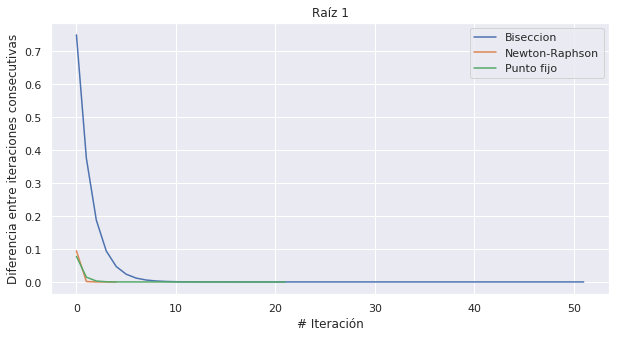

In [183]:
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(data=bisec1['$\Delta r$'],label='Biseccion')
sns.lineplot(data=nr1[:-1]['$\Delta y$'].astype(float),label='Newton-Raphson')
sns.lineplot(data=pf1[:-1]['$\Delta y$'].astype(float),label='Punto fijo')
plt.title('Raíz 1')
plt.xlabel('# Iteración')
plt.ylabel('Diferencia entre iteraciones consecutivas')

Text(0, 0.5, 'Diferencia entre iteraciones consecutivas')

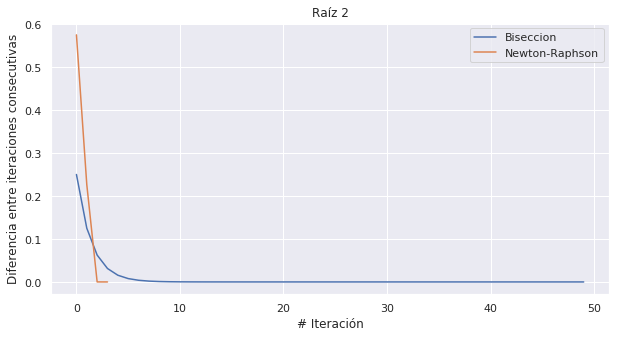

In [187]:
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(data=bisec2['$\Delta r$'],label='Biseccion')
sns.lineplot(data=nr2[:-1]['$\Delta y$'].astype(float),label='Newton-Raphson')
plt.title('Raíz 2')
plt.xlabel('# Iteración')
plt.ylabel('Diferencia entre iteraciones consecutivas')

Text(0, 0.5, 'Diferencia entre iteraciones consecutivas')

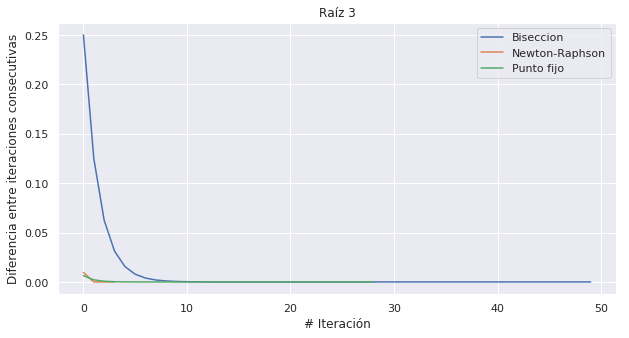

In [188]:
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(data=bisec3['$\Delta r$'],label='Biseccion')
sns.lineplot(data=nr3[:-1]['$\Delta y$'].astype(float),label='Newton-Raphson')
sns.lineplot(data=pf3[:-1]['$\Delta y$'].astype(float),label='Punto fijo')
plt.title('Raíz 3')
plt.xlabel('# Iteración')
plt.ylabel('Diferencia entre iteraciones consecutivas')

# Item 3

In [224]:
nr(p0=0.77,f=Function(0.3).calc,max_iter=200,tol=tolerancia,der_f=der_f)

,y,$\Delta y$,$\Delta y/y$
0,0.770000000000,24.348063344,31.6208614857
1,25.118063343990,23.282666188,0.926929193111
2,1.835397156038,0.303598926985,0.165413205521
3,1.531798229054,0.0220863455449,0.0144185736254
4,1.509711883509,0.000165248297203,0.000109456843394
5,1.509546635211,9.47790446126e-09,6.27864303108e-09
6,1.509546625734,2.22044604925e-16,1.47093571765e-16
7,1.509546625734,-,-


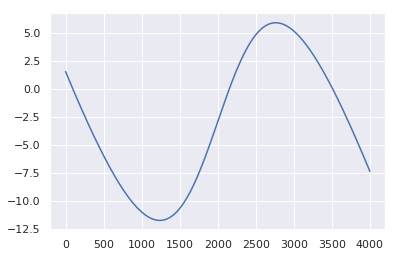

In [225]:
plt.plot(Function(0.3).calc(np.arange(-2,2,0.001)))

# Item 4

Text(0.5, 1.0, 'Gráfica de F(y) con -3 < y < 3, m=0')

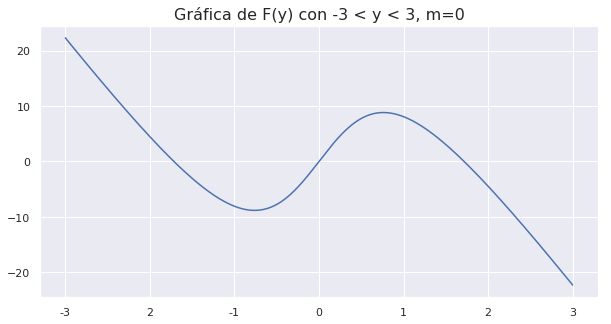

In [262]:
plt.subplots(figsize=(10,5))
plt.plot(f(np.arange(-3,3,0.001)))
plt.xticks(ticks=[0,1000,2000,3000,4000,5000,6000],labels=['-3','2','-1','0','1','2','3'])
plt.title('Gráfica de F(y) con -3 < y < 3, m=0',size=16)

## $0.6 \cdot m_0$

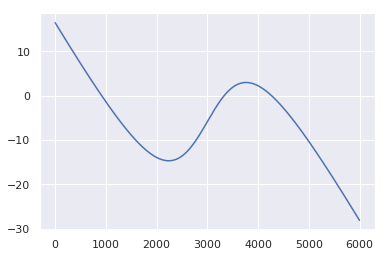

In [248]:
plt.plot(Function(0.6).calc(np.arange(-3,3,0.001)))

In [228]:
nr(der_f=der_f,f=Function(0.6).calc,p0=-2,max_iter=20,tol=tolerancia).tail(1)['y']

5   -2.082536379573
Name: y, dtype: float64

In [230]:
nr(der_f=der_f,f=Function(0.6).calc,p0=0.1,max_iter=20,tol=tolerancia).tail(1)['y']

6    0.329817768527
Name: y, dtype: float64

In [233]:
nr(der_f=der_f,f=Function(0.6).calc,p0=500,max_iter=20,tol=tolerancia).tail(1)['y']

6    1.266421327624
Name: y, dtype: float64

## $0.9 \cdot m_0$

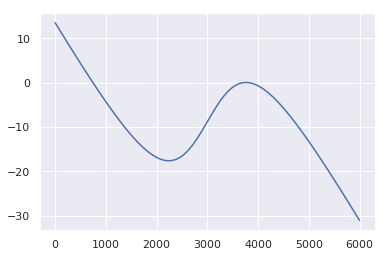

In [249]:
plt.plot(Function(0.9).calc(np.arange(-3,3,0.001)))

In [240]:
nr(der_f=der_f,f=Function(0.9).calc,p0=-30,max_iter=20,tol=tolerancia).tail(1)['y']

5   -2.253677917343
Name: y, dtype: float64

In [239]:
nr(der_f=der_f,f=Function(0.9).calc,p0=0.3,max_iter=20,tol=tolerancia).tail(1)['y']

21    0.694426705978
Name: y, dtype: float64

In [236]:
nr(der_f=der_f,f=Function(0.9).calc,p0=500,max_iter=20,tol=tolerancia).tail(1)['y']

9    0.830394306826
Name: y, dtype: float64

## $1.2 \cdot m_0$

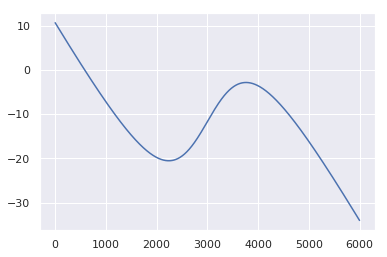

In [250]:
plt.plot(Function(1.2).calc(np.arange(-3,3,0.001)))

In [241]:
nr(der_f=der_f,f=Function(1.2).calc,p0=-50,max_iter=20,tol=tolerancia).tail(1)['y']

6   -2.419939975226
Name: y, dtype: float64

In [242]:
nr(der_f=der_f,f=Function(1.2).calc,p0=0.1,max_iter=20,tol=tolerancia).tail(1)['y']

16   -2.419939975226
Name: y, dtype: float64

In [244]:
nr(der_f=der_f,f=Function(1.2).calc,p0=500,max_iter=20,tol=tolerancia).tail(1)['y']

8   -2.419939975226
Name: y, dtype: float64

## $1.5 \cdot m_0$

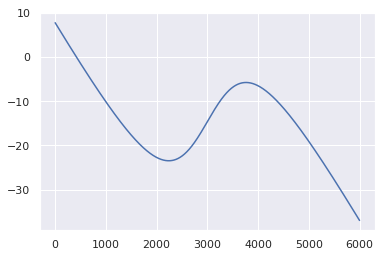

In [251]:
plt.plot(Function(1.5).calc(np.arange(-3,3,0.001)))

In [245]:
nr(der_f=der_f,f=Function(1.5).calc,p0=-2,max_iter=20,tol=tolerancia).tail(1)['y']

5   -2.582612634852
Name: y, dtype: float64

In [246]:
nr(der_f=der_f,f=Function(1.5).calc,p0=0.1,max_iter=20,tol=tolerancia).tail(1)['y']

7   -2.582612634852
Name: y, dtype: float64

In [247]:
nr(der_f=der_f,f=Function(1.5).calc,p0=500,max_iter=20,tol=tolerancia).tail(1)['y']

11   -2.582612634852
Name: y, dtype: float64